**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [509]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# import data 2C_weka.csv for 2 Class Classifcation.


In [510]:
Class_2 = pd.read_csv('2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [511]:
Class_2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [512]:
Class_2.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [513]:
print(Class_2.info(),'\n\n\nSum of count of null values:\n\n',Class_2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB
None 


Sum of count of null values:

 pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [514]:
# There are no missing values

In [515]:
# Unique values of the 'class'
Class_2['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [516]:
Class_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [517]:
Class_2.groupby('class').count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


In [518]:
Class_2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

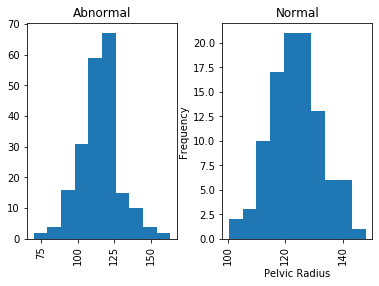

In [519]:
Class_2['pelvic_radius'].hist(by=Class_2['class'])
plt.xlabel('Pelvic Radius')
plt.ylabel('Frequency')
plt.show()

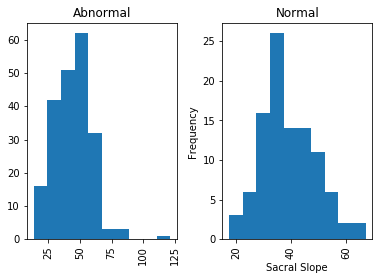

In [520]:
Class_2['sacral_slope'].hist(by=Class_2['class'])
plt.xlabel('Sacral Slope')
plt.ylabel('Frequency')
plt.show()

# Encode the Class variable to integer.

In [521]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [522]:
number = LabelEncoder()
Class_2['class']=number.fit_transform(Class_2['class'])
Class_2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [523]:
Class_2.shape

(310, 7)

In [524]:
C2_feature=Class_2.drop(labels='class',axis=1)
C2_target=Class_2['class']
C2_feature.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


# Normalize your Data (X) to get values between 0 to 1.

In [525]:
scaler=MinMaxScaler()
C2_scaled=scaler.fit_transform(C2_feature)
C2_scaled

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

In [526]:
X=C2_scaled
y=np.array(C2_target)

# Split the dat as train and test with a ratio of 70:30.

In [527]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [528]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [529]:
NNH=KNeighborsClassifier(n_neighbors= 5,weights='distance')
NNH.fit(X_train,y_train)
predicted_labels = NNH.predict(X_test)
predicted_labels

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0])

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [530]:
NNH.score(X_test, y_test)

0.7526881720430108

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

[0.7634408602150538, 0.7526881720430108, 0.7419354838709677, 0.7526881720430108, 0.7634408602150538, 0.7634408602150538, 0.7849462365591398, 0.7526881720430108, 0.7849462365591398, 0.8064516129032258, 0.8064516129032258, 0.7956989247311828, 0.8064516129032258, 0.8064516129032258, 0.7849462365591398, 0.7849462365591398, 0.7956989247311828, 0.7956989247311828, 0.7741935483870968, 0.7741935483870968, 0.7849462365591398, 0.7849462365591398, 0.7741935483870968, 0.7849462365591398, 0.7741935483870968, 0.7849462365591398, 0.7741935483870968, 0.7741935483870968, 0.7741935483870968, 0.7741935483870968, 0.7741935483870968, 0.7634408602150538, 0.7634408602150538, 0.7634408602150538, 0.7526881720430108, 0.7634408602150538, 0.7526881720430108, 0.7634408602150538, 0.7634408602150538, 0.7634408602150538, 0.7634408602150538, 0.7526881720430108, 0.7634408602150538, 0.7634408602150538, 0.7634408602150538, 0.7634408602150538, 0.7419354838709677, 0.7419354838709677, 0.7311827956989247, 0.7204301075268817]

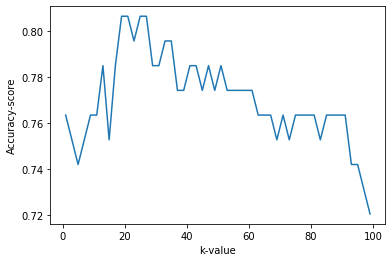

In [531]:
acs=[]
for k in range(1,100,2):
    NNH=KNeighborsClassifier(n_neighbors= k)
    NNH.fit(X_train,y_train)
    predicted_labels = NNH.predict(X_test)
    a=accuracy_score(predicted_labels,y_test)
    acs.append(a)
print(acs)
k=range(1,100,2)
plt.plot(k,acs)
plt.xlabel('k-value')
plt.ylabel('Accuracy-score')
plt.show()

In [532]:
max(acs)

0.8064516129032258

In [533]:
k_best = k[acs.index(max(acs))]
print('The best value of k for the classification is: {}'.format(k_best))

The best value of k for the classification is: 19


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [534]:
Class_3 = pd.read_csv('3Classdata.csv')

In [535]:
Class_3.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [536]:
Class_3.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [537]:
print(Class_3.info(),'\n\n\nSum of count of null values:\n\n',Class_3.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB
None 


Sum of count of null values:

 pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [538]:
#There are no missing or null values

In [539]:
# Unique values of the 'class'
Class_3['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [540]:
Class_3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [541]:
Class_3.groupby('class').count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


In [542]:
Class_2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int32
dtype: object

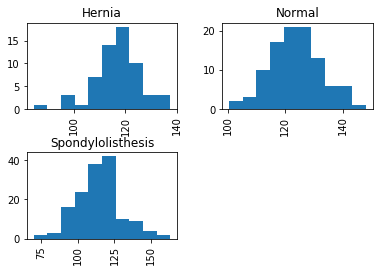

In [543]:
Class_3['pelvic_radius'].hist(by=Class_3['class'])
plt.show()

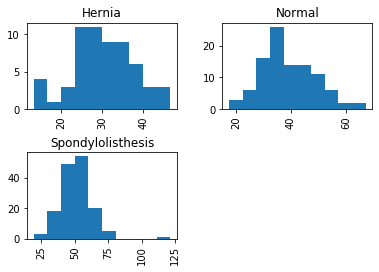

In [544]:
Class_3['sacral_slope'].hist(by=Class_3['class'])
plt.show()

In [545]:
number = LabelEncoder()
Class_3['class']=number.fit_transform(Class_3['class'])
Class_3.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [546]:
C3_feature=Class_3.drop(labels='class',axis=1)
C3_target=Class_3['class']
C3_feature.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [547]:
scaler=MinMaxScaler()
C3_scaled=scaler.fit_transform(C3_feature)
C3_scaled

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

In [548]:
X1=C3_scaled
y1=np.array(C3_target)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=1)

In [549]:
NN=KNeighborsClassifier(n_neighbors= 5,weights='distance')
NN.fit(X1_train,y1_train)
predicted_labels = NN.predict(X1_test)
predicted_labels

array([2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2,
       0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1,
       2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 2])

In [550]:
NN.score(X1_test, y1_test)

0.7096774193548387

[0.6881720430107527, 0.6989247311827957, 0.6989247311827957, 0.7096774193548387, 0.7419354838709677, 0.7311827956989247, 0.7526881720430108, 0.7311827956989247, 0.7311827956989247, 0.7311827956989247, 0.7526881720430108, 0.7311827956989247, 0.7526881720430108, 0.7419354838709677, 0.7311827956989247, 0.7419354838709677, 0.7634408602150538, 0.7526881720430108, 0.7311827956989247, 0.7311827956989247, 0.7419354838709677, 0.7526881720430108, 0.7419354838709677, 0.7526881720430108, 0.7096774193548387, 0.7096774193548387, 0.7096774193548387, 0.6881720430107527, 0.7096774193548387, 0.7204301075268817, 0.6989247311827957, 0.7204301075268817, 0.7096774193548387, 0.7311827956989247, 0.7096774193548387, 0.6666666666666666, 0.6881720430107527, 0.6989247311827957, 0.6881720430107527, 0.6666666666666666, 0.6666666666666666, 0.6774193548387096, 0.6559139784946236, 0.6451612903225806, 0.6451612903225806, 0.6559139784946236, 0.6559139784946236, 0.6559139784946236, 0.6559139784946236, 0.6666666666666666]

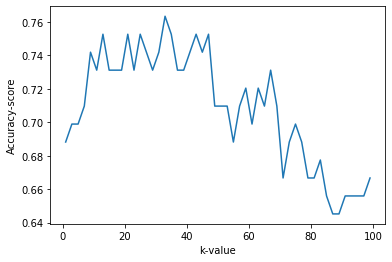

In [551]:
acs1=[]
for k1 in range(1,100,2):
    NN=KNeighborsClassifier(n_neighbors= k1)
    NN.fit(X1_train,y1_train)
    predicted_labels = NN.predict(X1_test)
    a=accuracy_score(predicted_labels,y1_test)
    acs1.append(a)
print(acs1)
k1=range(1,100,2)
plt.plot(k1,acs1)
plt.xlabel('k-value')
plt.ylabel('Accuracy-score')
plt.show()

In [555]:
max(acs1)

0.7634408602150538

In [552]:
k1_best = k1[acs1.index(max(acs1))]
print('The best value of k for the classification is: {}'.format(k1_best))

The best value of k for the classification is: 33
